In [1]:
# Import modules
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

In [2]:
# sin integrand
def sin_integrand(x):
    return np.sin(np.pi*x*x/2)

In [3]:
# cos integrand
def cos_integrand(x):
    return np.cos(np.pi*x*x/2)

In [4]:
# S(u) of Fresnel integrals
def Fresnel_S(u):
    return integrate.quad(sin_integrand,0,u)

vFresnel_S = np.vectorize(Fresnel_S)

In [5]:
# C(u) of Fresnel integrals
def Fresnel_C(u):
    return integrate.quad(cos_integrand,0,u)

vFresnel_C = np.vectorize(Fresnel_C)

In [6]:
# Evaluate Fresnel integrals
u = np.linspace(-10,10,1000)
S, error_S = np.array(vFresnel_S(u))
C, error_C = np.array(vFresnel_C(u))

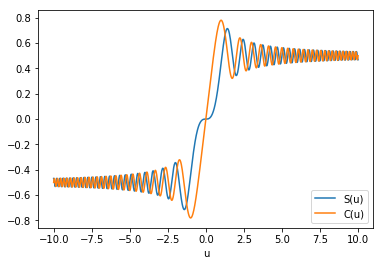

In [7]:
# Plot Fresnel integrals against u
plt.plot(u,S)
plt.plot(u,C)
plt.xlabel('u')
plt.legend(['S(u)', 'C(u)'], loc='lower right')
plt.savefig("Fresnel_Integrals.pdf")

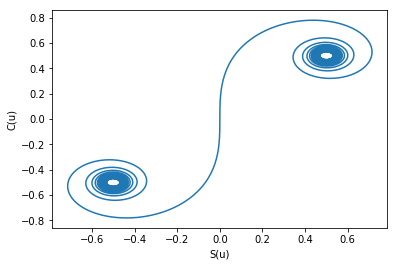

In [8]:
# Plot Cornu spiral
plt.plot(S,C)
plt.xlabel('S(u)')
plt.ylabel('C(u)')
plt.savefig("Cornu_Spiral.pdf")

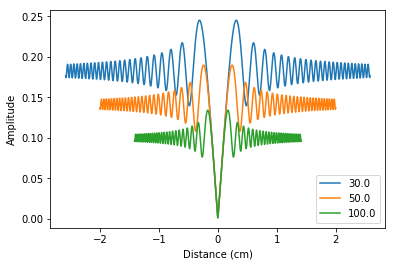

In [9]:
# Plot relative amplitude
wavelength = 1.0
screen_distance = [30.0,50.0,100.0]

for D in screen_distance:
    scaling = np.sqrt(2/(wavelength*D))
    plt.plot(u*scaling,(np.sqrt(S*S+C*C))*scaling)

plt.legend(screen_distance, loc='lower right')
plt.xlabel('Distance (cm)')
plt.ylabel('Amplitude')
plt.savefig("Relative_Amplitude.pdf")

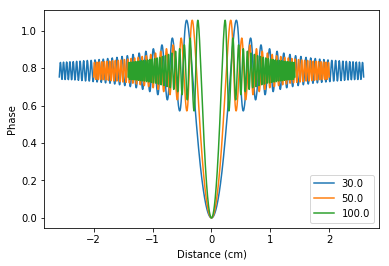

In [10]:
# Plot phase
for D in screen_distance:
    scaling = np.sqrt(2/(wavelength*D))
    plt.plot(u*scaling,np.arctan(S/C))

plt.legend(screen_distance, loc='lower right')
plt.xlabel('Distance (cm)')
plt.ylabel('Phase')
plt.savefig("Phase.pdf")